## Polynomial Curve Fitting
We are going to implement linear regression.

In [30]:
import pandas as pd
import numpy as np
from numpy.linalg import inv

### load input and target data

In [55]:
data_dir = './data/'
train_f = '4_train.csv'
test_f = '4_test.csv'
df_tr = pd.read_csv(data_dir+train_f)
df_ts = pd.read_csv(data_dir+test_f)
tr_target = df_tr['t']
tr_input = df_tr['x']
ts_target = df_ts['t']
ts_input = df_ts['x']
N_tr = len(tr_target)
N_ts = len(ts_target)
# print(type(tr_target))
# print(len(tr_target))
# print(tr_target[19])
# print(tr_target)
print(ts_input)

0    2.383277
1    5.199877
2    4.333231
3    3.249923
4    2.599939
5    1.083308
6    3.466585
7    5.416539
8    4.766554
9    3.683247
Name: x, dtype: float64


### Training stage
fit the data by applying a polynomial function of the form:
$$y(x, w) = w_{0} + w_{1}*x + w_{1}*x^{2} + ... + w_{M}*x^{M} = \sum_{j=0}^{M}w_j*x^{j}$$

and minimize the Error function at the same time, the error function look as follows:
$$E(w) = \frac{1}{2}*\sum_{n=1}^{N}(y(x_n,w)-t_n)^{2} $$

In [59]:
'''
base on the formula we can then know that the best W = (phi^T * phi)^-1 * phi^T * t.
which phi = [[x1^0,x1^1....x1^M],[x2^0,x2^1....x2^M], .... [xN^0,xN^1....xN^M]]
which t = [t1,t2,t3 ... ,tN]
The output result of W would be in dimension of (M+1)*1
''' 

tr_rms_ary = []
ts_rms_ary = []
for M in range(1,10):
    # Init data-num, valu-M and matrix-initialization
    N = len(tr_input)
    Phi_mat = np.zeros((N,M+1))
    T = np.zeros((N,1))
    W = np.zeros((M,1))
    # print(Phi_mat.shape)

    for r_idx in range(Phi_mat.shape[0]):
        for c_idx in range(Phi_mat.shape[1]):
            Phi_mat[r_idx][c_idx] = tr_input[r_idx]**(c_idx)

        T[r_idx][0] = tr_target[r_idx]

    # Start calculating W result
    phi_transpose = Phi_mat.transpose()
    W_tmp = inv(np.dot(phi_transpose , Phi_mat))
    W = np.dot( np.dot(W_tmp , phi_transpose) , T)


    # Root mean square
    def poly_func (x, w_ary):
        y = 0
        for i in range(len(w_ary)):
            y += w_ary[i]*(x**i)
        return y

    def Cal_rms(length, input_data, target_data, W):
        Err = 0
        for n in range(length):
            # careful on the transpose result have to index into it again
            Err += (poly_func(input_data[n], W.transpose()[0]) - target_data[n])**2 
        Err /= 2
        RMS_err = np.sqrt((2*Err)/length)
        
        return RMS_err
    
    RMS_err_tr = Cal_rms(N_tr, tr_input, tr_target, W)
    RMS_err_ts = Cal_rms(N_ts, ts_input, ts_target, W)
    tr_rms_ary.append(RMS_err_tr)
    ts_rms_ary.append(RMS_err_ts)
    
    print('testing rms-Err for M = %s is %s.' % (str(M),str(RMS_err_tr)))
    print('testing rms-Err for M = %s is %s.' % (str(M),str(RMS_err_ts)))
    
#     Err_tr = 0
#     Err_ts = 0
#     for n in range(N_tr):
#         # careful on the transpose result have to index into it again
#         Err_tr += (poly_func(tr_input[n], W.transpose()[0]) - tr_target[n])**2 
#     Err_tr /= 2
#     RMS_err_tr = np.sqrt((2*Err_tr)/N_tr)
#     print('training rms-Err for M = %s is %s.' % (str(M),str(RMS_err_tr)))
#     for n in range(N_ts):
#         # careful on the transpose result have to index into it again
#         Err_ts += (poly_func(ts_input[n], W.transpose()[0]) - ts_target[n])**2 
#     Err_ts /= 2
#     RMS_err_ts = np.sqrt((2*Err_ts)/N_ts)
#     print('testing rms-Err for M = %s is %s.' % (str(M),str(RMS_err_ts)))

testing rms-Err for M = 1 is 2.43625016533.
testing rms-Err for M = 1 is 2.55512423758.
testing rms-Err for M = 2 is 2.09847079707.
testing rms-Err for M = 2 is 2.272433502.
testing rms-Err for M = 3 is 2.09426470667.
testing rms-Err for M = 3 is 2.20199758179.
testing rms-Err for M = 4 is 2.0678005492.
testing rms-Err for M = 4 is 2.08337259908.
testing rms-Err for M = 5 is 1.11914381432.
testing rms-Err for M = 5 is 1.25146852378.
testing rms-Err for M = 6 is 1.11663205567.
testing rms-Err for M = 6 is 1.21720169395.
testing rms-Err for M = 7 is 0.836488442361.
testing rms-Err for M = 7 is 1.56119720846.
testing rms-Err for M = 8 is 0.816067604021.
testing rms-Err for M = 8 is 1.48315822277.
testing rms-Err for M = 9 is 0.752874115134.
testing rms-Err for M = 9 is 1.5594867296.


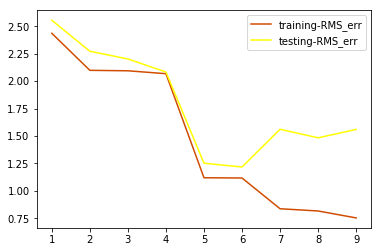

In [76]:
# visualize result
import matplotlib.pyplot as plt
%matplotlib inline

cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, 4)]
plt.plot(range(1,10),tr_rms_ary ,color=colors[1], label='training-RMS_err'.format(i=0))
plt.plot(range(1,10),ts_rms_ary ,color=colors[2], label='testing-RMS_err'.format(i=1))
#          'ro-', label='training-RMSerr'.format(0),range(1,10),ts_rms_ary,'bo-',label='testing-RMSerr'.format(0))
# plt.axis([0, 6, 0, 20])
plt.legend(loc='best')
plt.show()

In [35]:

# test functino on dot
a = np.array([[1., 2.], [3., 4.]])
b = np.array([[1., 2.], [3., 4.]])
np.dot(a, b)

array([[  7.,  10.],
       [ 15.,  22.]])

array([[  7.,  10.],
       [ 15.,  22.]])